# Kellogg's method

In [1]:
%matplotlib inline
import math;
import numpy as np;
import matplotlib.pyplot as plt;
import random

In [2]:
# integrate(f(t)dt) from a to b
def integrate_riemann(f, a, b):
    sum = 0
    n = len(f)
    for i in range(0, n - 1):
        # print("i: "+str(i))
        now = f[i]*(b-a)/(n * 1.0 - 1)
        # print("now: "+str(now))
        sum+=now
    return sum

# integrate(f(t)dt) from a to b
def integrate_1var(f, a, b):
    return integrate_riemann(f, a, b)

In [3]:
# integrate(f(x, t)dt) from a to b
# f:
# (x0, t0), (x0, t1), ... , (x0, tn)
# (x1, t0), (x1, t1), ... , (x1, tn)
# ...
# (xm, t0), (xm, t1), ... , (xm, tn)
def integrate2var(f, a, b):
    m = len(f)
    n = len(f[0])
    res = []
    for i in range(0, m):
        #res.append(integrate_1var(f[i], a, b))
        res.append(integrate_1var(list(f[j][i] for j in range(0, len(f))), a, b))
    #<debug>
    #print("Entered integrate2var")
    #print("f[500]:")
    #plot_graph(f[500], a, b)
    #plt.grid()
    #plt.show()
    #print("f^T[500] :")
    #plot_graph(list(f[i][500] for i in range(0, len(f))), a, b)
    #plt.grid()
    #plt.show()
    #print("integrate_1var(f[500], a, b): "+str(res[500]))
    #print("Left integrate2var")
    #</debug>
    return res

In [4]:
# Generates discrete function table
# for function f
# with n measurements
# all functions are considered as 2-variable functions
# f(t, x)
# If parameter x in not used (f is 1-variable),
# then x_arg = None
def generate_function_table(f, a, b, n, x_arg = None):
    res = []
    for i in range(0, n):
        res.append(f(a+(b-a)/(n-1)*i, x_arg))
    return res

In [5]:
def plot_graph(f, a, b, c=None):
    x = np.linspace(a,b,len(f))
    #plt.gca().set_aspect('equal', adjustable='box')
    if c == None:
        plt.plot(x,f,marker=".")
    else:
        plt.plot(x,f,marker=".", c=c)

In [6]:
# Applies operator A with core K for function f
# in hybrid space H[a, b]
# K:
# (x0, t0), (x0, t1), ... , (x0, tn)
# (x1, t0), (x1, t1), ... , (x1, tn)
# ...
# (xm, t0), (xm, t1), ... , (xm, tn)
def operA(f, K, a, b):
    for_int = list(list(K[i][j] * f[j] for j in range(0, len(K[0]))) for i in range(0, len(K)))
    #<debug>
    #print("Entered operA")
    #print("a: "+str(a))
    #print("b: "+str(b))
    #print("f: ")
    #plot_graph(f, a, b)
    #plt.grid()
    #plt.show()
    #print("for_int[0]: ")
    #plot_graph(for_int[0], a, b)
    #plt.grid()
    #plt.show()
    #print("for_int[500]: ")
    #plot_graph(for_int[500], a, b)
    #plt.grid()
    #plt.show()
    #print("for_int[999]: ")
    #plot_graph(for_int[999], a, b)
    #plt.grid()
    #plt.show()
    #</debug>
    after_int = integrate2var(for_int, a, b)
    #<debug>
    #print("after_int: ")
    #plot_graph(after_int, a, b)
    #plt.grid()
    #plt.show()
    #print("Left operA")
    #</debug>
    return after_int

In [7]:
# TODO:
# correct this function
def select_y0(a, b, n, K):
    res = list(1 for i in range(0, n))
    #res = list()
    #res.append(100)
    #for i in range(0, n - 1):
    #    res.append(res[i] + random.uniform(-abs(res[i])/1000, abs(res[i])/1000))
    aft_A = operA(res, K, a, b)
    sum = 0
    for i in range(0, len(aft_A)):
        if aft_A[i]!=0.0:
            sum=1;
            break
    if sum!=0:
        return res
    return select_y0(a, b, n, K)
    return res

In [8]:
# Normed hybrid metric space H[a, b] is considered
# norm(f) = sqrt(integrate((f(x)^2)dx) from a to b)
def norm_integral(f, a, b):
    # square of function f
    f2 = list(f[i]*f[i] for i in range(0, len(f)))
    res = integrate_1var(f2, a, b)
    return res**(0.5)

In [9]:
# Normed hybrid metric space H[a, b] is considered
def dist_integral(f, g, a, b):
    fin = list((f[i]-g[i])**2 for i in range(0, len(f)))
    res = integrate_1var(fin, a, b)
    return res**(0.5)

def dist(f, g, a, b):
    return dist_integral(f, g, a, b)
    res = abs(f[0] - g[0])
    for i in range(0, len(f)):
        res = max(res, abs(f[i] - g[i]))
    return res


In [10]:
# Kernel for Fredholm operator.
# To calculate result for another data,
# it's required to change this function
# and variables a_lim, b_lim only
def Kernel_Fredholm(x, t):
    #my kernel
    return math.log1p(x*t)

# Considering space H[a_lim, b_lim]
# my operator limits
a_lim = 0
b_lim = 1

In [11]:
def gen_Kernel_tab(K, a, b, n):
    K_tab = list(list(K(a+(b-a)/(n-1)*i, a+(b-a)/(n-1)*j,) for j in range(0, n)) for i in range(0, n))
    return K_tab

In [12]:
# n measurements, n - 1 intervals
def Fredholm_method(K, a, b, iter_total, n):
    eps = 2 * (10**(-2))
    #n = 1000
    #K_tab = list(list(K(a+(b-a)/(n-1)*i, a+(b-a)/(n-1)*j,) for j in range(0, n)) for i in range(0, n))
    #plot_graph(K[500], a, b)
    y0 = select_y0(a, b, n, K)
    y = list()
    y.append(y0)
    z = list()
    y0_norm = norm_integral(y0, a, b)
    z.append(list(y0[i]/y0_norm for i in range(0, len(y0))))
    mu = list()
    mu.append(-1)
    #print("y0")
    #print(y[0][:10])
    #print("z0")
    #print(z[0][:10])
    #print("norm(z[0])")
    #print(norm_integral(z[0], a, b))
    k = 0
    while(True):
    #for k in range(0, iter_total):
        y.append(operA(y[k], K, a, b))
        norm_yk1 = norm_integral(y[k+1], a, b)
        mu.append(norm_integral(y[k], a, b)/norm_integral(y[k+1], a, b))
        z.append(list(y[k+1][i]/norm_yk1 for i in range(0, len(y[k+1]))))
        #print("z["+str(k+1)+"]")
        #print(z[k+1][:10])
        #print("z["+str(k+1)+"] 2nd variant")
        Azn = operA(z[k], K, a, b)
        #print(list(Azn[i]*mu[k+1] for i in range(0, len(Azn)))[:10])
        #cheching convergency conditions
        if(k >= 3 and k >= iter_total - 1):
            d_zkp1_zkm1 = dist(z[k+1], z[k - 1], a, b)
            d_zk_zkm2 = dist(z[k], z[k - 2], a, b)
            d_mukp1_muk = abs(mu[k+1] - mu[k])
            print("iter "+str(k + 1))
            print("dist_integral(z[k+1], z[k - 1], a, b)")
            print(d_zkp1_zkm1)
            print("dist_integral(z[k], z[k - 2], a, b)")
            print(d_zk_zkm2)
            print("abs(mu[k+1] - mu[k])")
            print(d_mukp1_muk)
            if d_zkp1_zkm1 < eps \
                and d_zk_zkm2 < eps \
                and d_mukp1_muk < eps:
                    #checking equality of even and odd subsequences of z
                    flag = True
                    for i in range(0, len(z[k+1])):
                        if abs(z[k+1][i]-z[k][i])>=eps:
                            flag=False;
                            break;
                    if flag:
                        return (mu[k+1], z[k+1], y, z, mu)
                    else:
                        #last z is from even subseq
                        if k%2==0:
                            return (-mu[k+1], list(z[k+1][i]-z[k][i] for i in range(0, len(z[k+1]))), y, z, mu)
                        else:
                            return (-mu[k+1], list(-z[k+1][i]+z[k][i] for i in range(0, len(z[k+1]))), y, z, mu)
        k+=1
    #return (y, z, mu)

# Special functions for displaying result

In [13]:
def show_lambda_and_vector(lam, z_ans):
    print("lambda = "+str(lam))
    print("function y(x): ")
    for i in range(0, 10):
        print("x = "+str(a_lim+(b_lim-a_lim)/(1000-1)*i)+"; y = "+str(z_ans[i]))
    print("...")
    for i in range(1000-10, 1000):
        print("x = "+str(a_lim+(b_lim-a_lim)/(1000-1)*i)+"; y = "+str(z_ans[i]))

In [14]:
def show_conseq_approx_z(zf):
    plot_lim_x1 = 10**9
    plot_lim_x2 = -10**9
    plot_lim_y1 = 10**9
    plot_lim_y2 = -10**9

    for i in range(0, len(zf)):
        for j in range(0, len(zf[i])):
            plot_lim_y1 = min(plot_lim_y1, zf[i][j])
            plot_lim_y2 = max(plot_lim_y2, zf[i][j])

    delta_x = (b_lim - a_lim) / 20
    delta_y = (plot_lim_y2 - plot_lim_y1) / 20
    plt.xlim(a_lim - delta_x, b_lim + delta_x)
    plt.ylim(plot_lim_y1 - delta_y, plot_lim_y2 + delta_y)
    #print("Consequentive approximations of z:")
    leg=[]
    for i in range(0, len(zf)):
        print("z"+str(i)+":")
        plot_graph(zf[i], a_lim, b_lim)
        #if i==0:
        #    plot_graph(zf[i], a_lim, b_lim, '#7F007F')
        #else:
        #    plot_graph(zf[i], a_lim, b_lim)
        plt.xlabel('t')
        plt.ylabel("z"+str(i)+"(t)")
        leg.append("z"+str(i))
        plt.grid()
        plt.show()
    #plt.legend(leg)
    #plt.grid()
    #plt.show()
    print("")

In [15]:
def show_mu(muf):
    print(muf[1:])

# Applying Fredholm method to the kernel

In [16]:
K_tab1 = gen_Kernel_tab(Kernel_Fredholm, a_lim, b_lim, 1000)
(lam, z_ans, yf, zf, muf) = Fredholm_method(K_tab1, a_lim, b_lim, 5, 1000)

iter 5
dist_integral(z[k+1], z[k - 1], a, b)
0.21521385624145195
dist_integral(z[k], z[k - 2], a, b)
0.2758940979737622
abs(mu[k+1] - mu[k])
0.0676787369186247
iter 6
dist_integral(z[k+1], z[k - 1], a, b)
0.1766495803804692
dist_integral(z[k], z[k - 2], a, b)
0.21521385624145195
abs(mu[k+1] - mu[k])
0.04454111735146338
iter 7
dist_integral(z[k+1], z[k - 1], a, b)
0.14989943460926755
dist_integral(z[k], z[k - 2], a, b)
0.1766495803804692
abs(mu[k+1] - mu[k])
0.03157231029825258
iter 8
dist_integral(z[k+1], z[k - 1], a, b)
0.13022878736163193
dist_integral(z[k], z[k - 2], a, b)
0.14989943460926755
abs(mu[k+1] - mu[k])
0.023562072400850287
iter 9
dist_integral(z[k+1], z[k - 1], a, b)
0.11514426386118908
dist_integral(z[k], z[k - 2], a, b)
0.13022878736163193
abs(mu[k+1] - mu[k])
0.018263570623432646
iter 10
dist_integral(z[k+1], z[k - 1], a, b)
0.1032040331780676
dist_integral(z[k], z[k - 2], a, b)
0.11514426386118908
abs(mu[k+1] - mu[k])
0.014574908794360297
iter 11
dist_integral(z[k+1],

# First pair of λ, characteristic vector

In [17]:
show_lambda_and_vector(lam, z_ans)

lambda = -2.6170059648068515
function y(x): 
x = 0.0; y = 0.0
x = 0.001001001001001001; y = 4.931417500786582e-147
x = 0.002002002002002002; y = 1.0903185770712539e-131
x = 0.003003003003003003; y = 1.0239152931227184e-122
x = 0.004004004004004004; y = 2.3670124345693846e-116
x = 0.005005005005005005; y = 2.0355260922406328e-111
x = 0.006006006006006006; y = 2.1826807222508504e-107
x = 0.007007007007007007; y = 5.563537063263878e-104
x = 0.008008008008008008; y = 4.95472192880397e-101
x = 0.009009009009009009; y = 1.9764299629606645e-98
...
x = 0.990990990990991; y = -0.017865726895182732
x = 0.991991991991992; y = -0.02399580524160161
x = 0.992992992992993; y = -0.030603711188644134
x = 0.993993993993994; y = -0.03771770037478106
x = 0.994994994994995; y = -0.045367483341443915
x = 0.995995995995996; y = -0.05358429380431584
x = 0.996996996996997; y = -0.06240095990385974
x = 0.997997997997998; y = -0.07185197855711145
x = 0.998998998998999; y = -0.08197359303773943
x = 1.0; y = -0.09

# Consequentive approximations of z

z0:


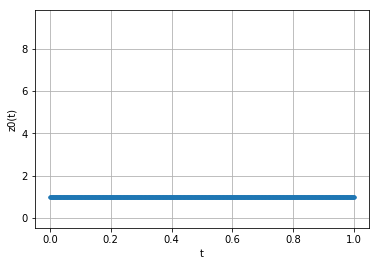

z1:


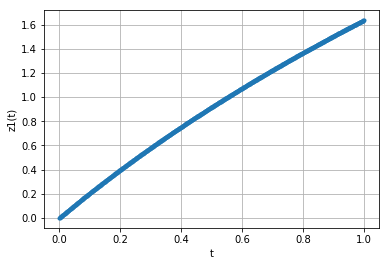

z2:


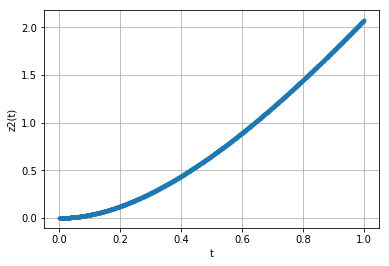

z3:


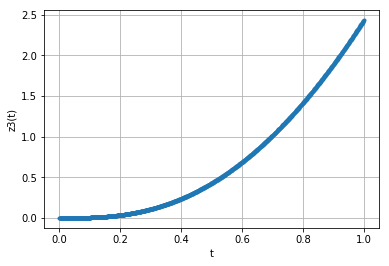

z4:


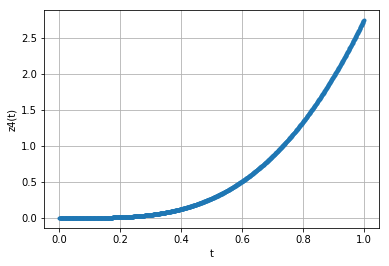

z5:


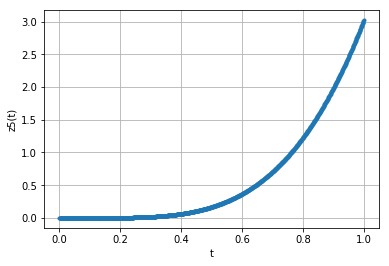

z6:


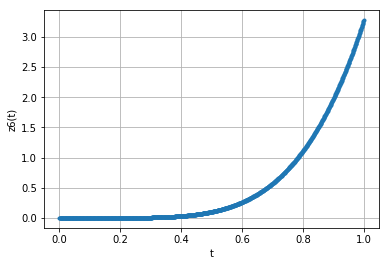

z7:


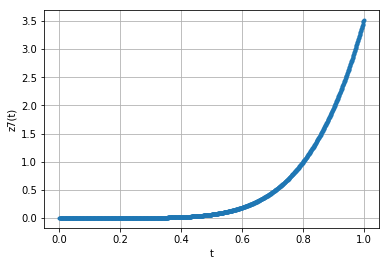

z8:


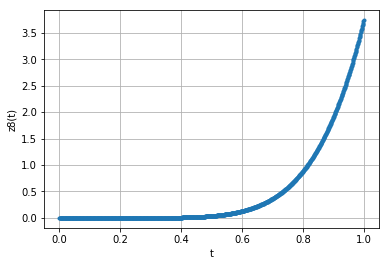

z9:


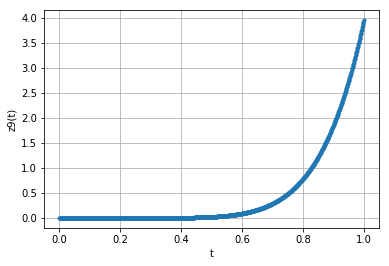

z10:


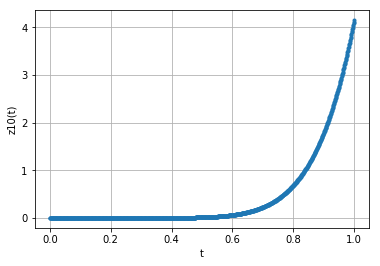

z11:


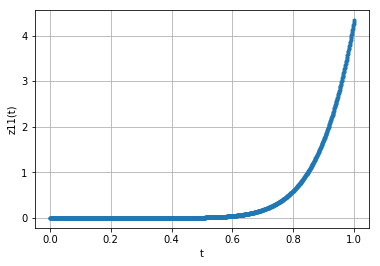

z12:


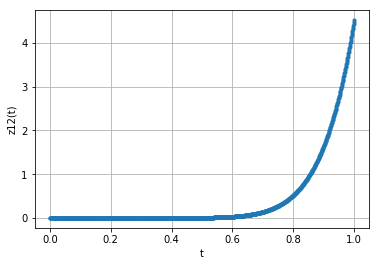

z13:


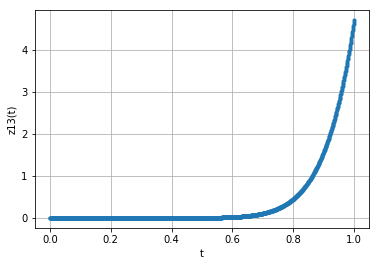

z14:


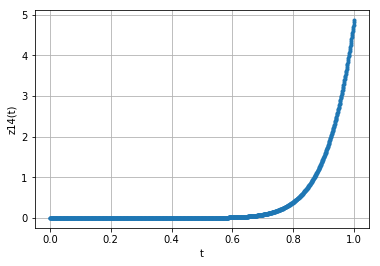

z15:


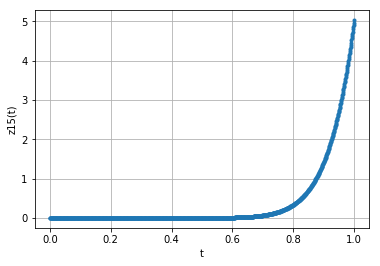

z16:


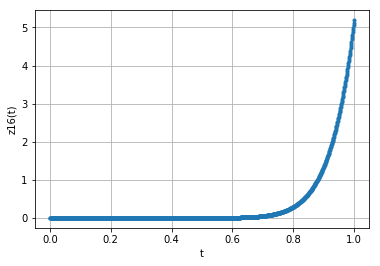

z17:


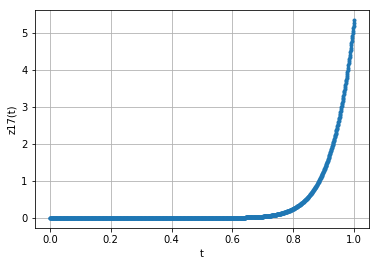

z18:


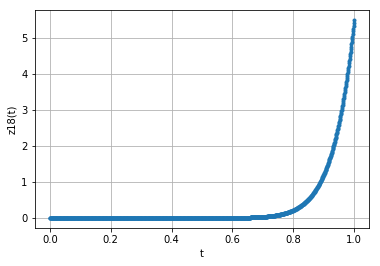

z19:


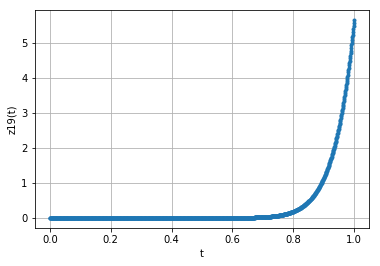

z20:


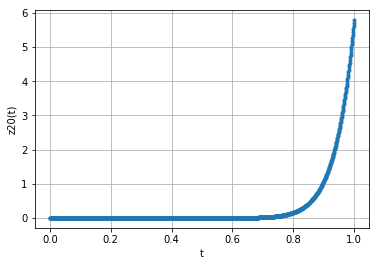

z21:


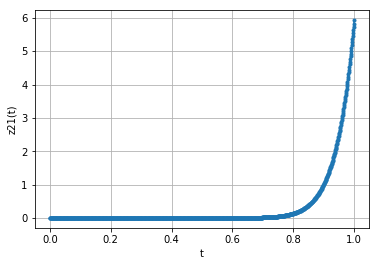

z22:


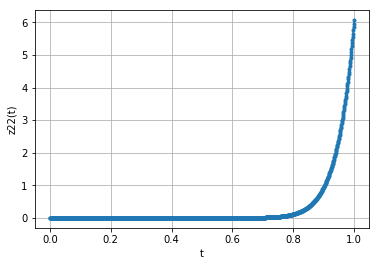

z23:


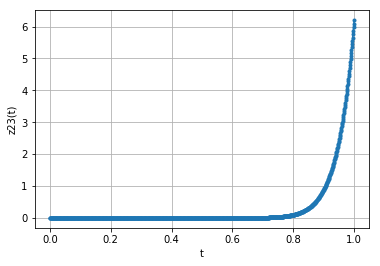

z24:


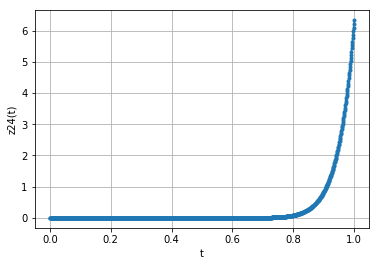

z25:


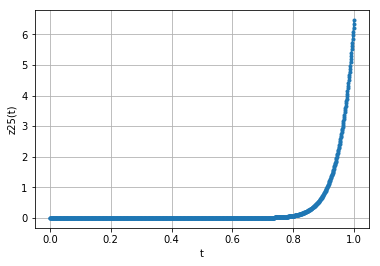

z26:


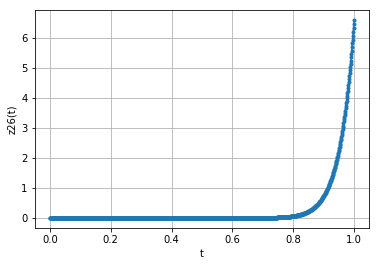

z27:


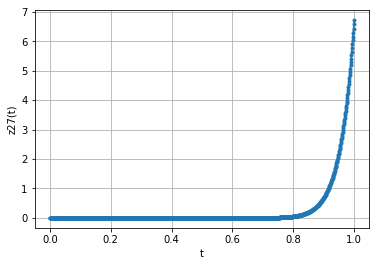

z28:


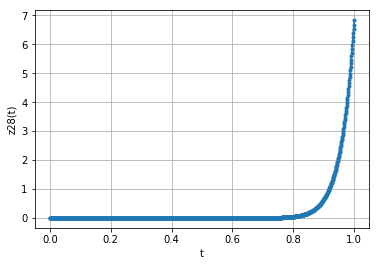

z29:


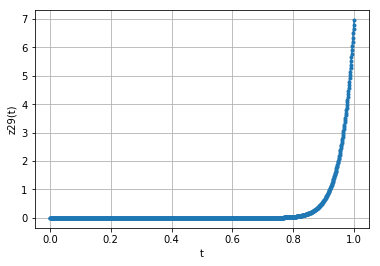

z30:


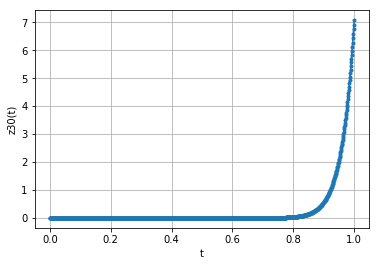

z31:


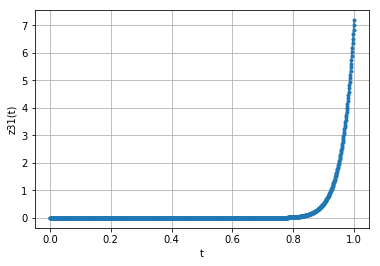

z32:


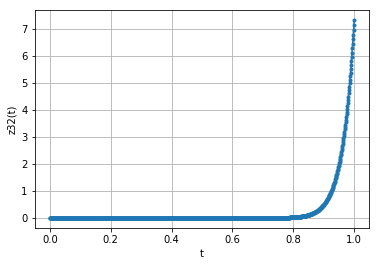

z33:


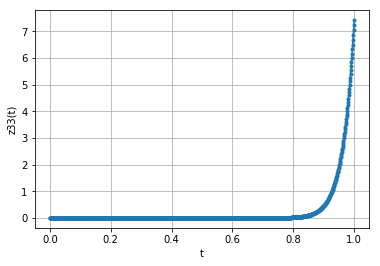

z34:


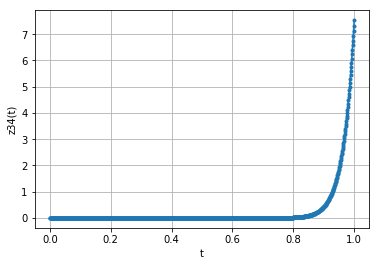

z35:


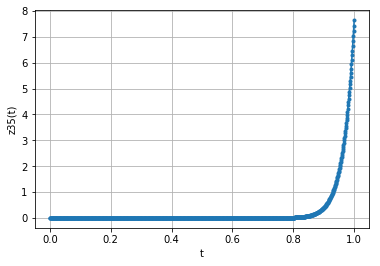

z36:


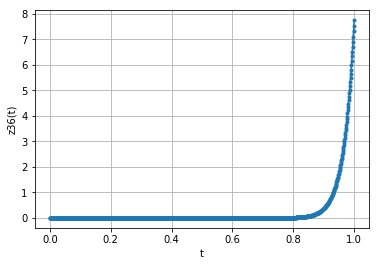

z37:


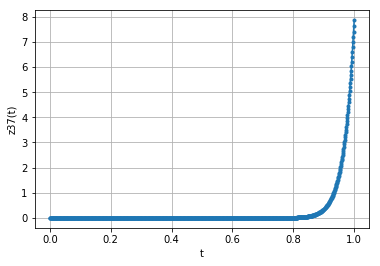

z38:


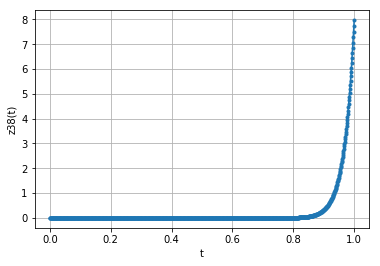

z39:


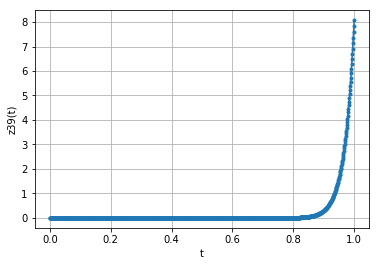

z40:


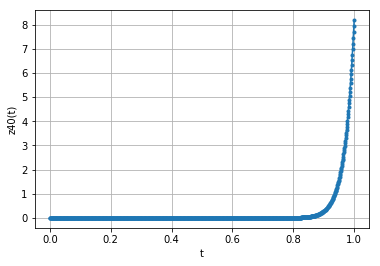

z41:


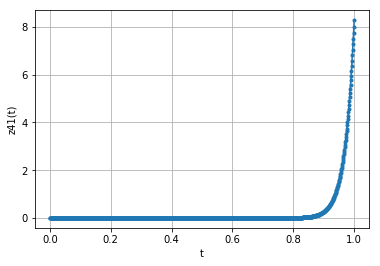

z42:


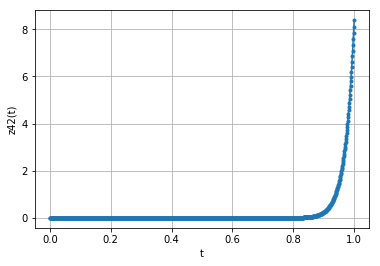

z43:


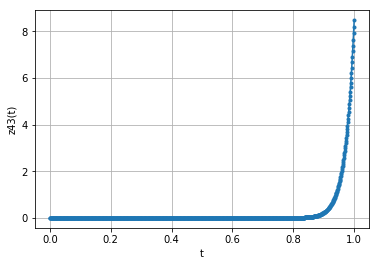

z44:


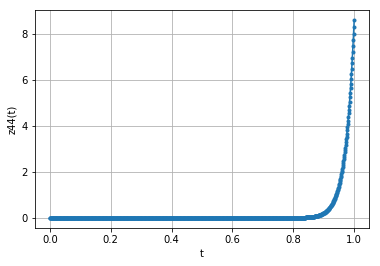

z45:


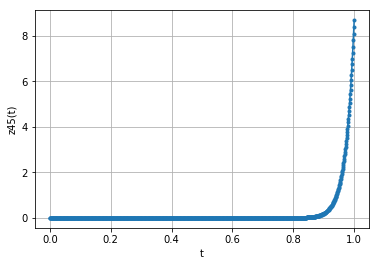

z46:


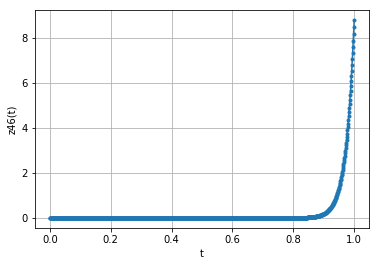

z47:


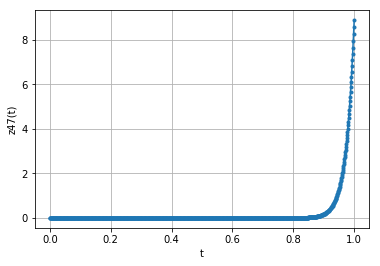

z48:


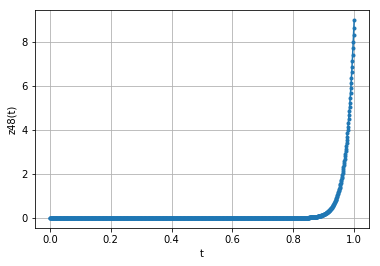

z49:


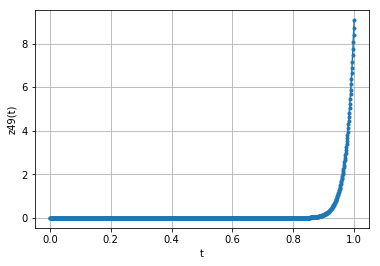

z50:


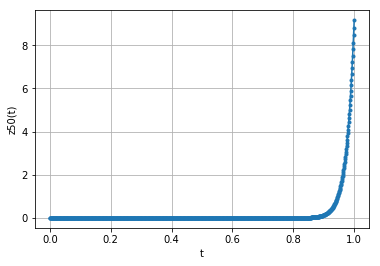

z51:


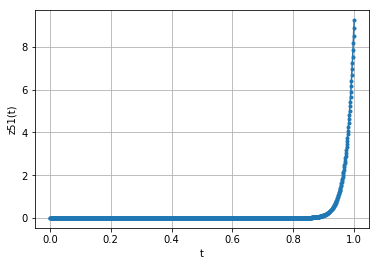

z52:


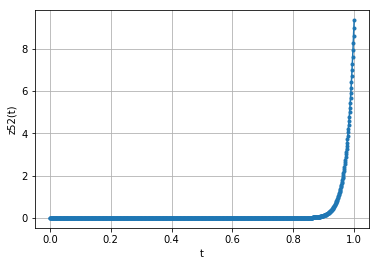

In [18]:
show_conseq_approx_z(zf)

# $μ_{i}$ sequence
i=1...

In [19]:
print(muf[1:])

[4.23813010433871, 3.2835414409888846, 3.0380383051826523, 2.92241428387649, 2.8547355469578655, 2.810194429606402, 2.7786221193081495, 2.755060046907299, 2.7367964762838666, 2.7222215674895063, 2.710318590848706, 2.7004135053070626, 2.692041653015031, 2.6848722410084997, 2.6786633333747294, 2.6732338708199315, 2.6684456435094557, 2.664191315418055, 2.6603862545774994, 2.6569628284350446, 2.653866337716889, 2.651052064606699, 2.6484830943966893, 2.6461286839693114, 2.643963023339408, 2.641964284010419, 2.6401138795087156, 2.6383958848669318, 2.6367965765641745, 2.635304064730354, 2.6339079967206738, 2.6325993164055146, 2.6313700673268867, 2.6302132306680215, 2.6291225910573877, 2.628092624782935, 2.6271184061679365, 2.626195528756182, 2.6253200386433475, 2.624488377825109, 2.623697335848815, 2.6229440083825115, 2.6222257615733824, 2.6215402012732008, 2.6208851463725304, 2.62025860561757, 2.6196587573902317, 2.6190839320187354, 2.6185325962567547, 2.61800333962717, 2.617494862374148, 2.

In [20]:
len(muf) - 1

52

In [21]:
len(zf) - 1

52

# Checking if result is actually correct

In [28]:
right_side = list(muf[len(muf) - 1] * i for i in operA(zf[len(zf)-1], K_tab1, a_lim, b_lim))

In [29]:
print(zf[len(zf)-1][:50])

[0.0, 6.459066000730994e-150, 2.8589429443107115e-134, 4.0311778470981036e-125, 1.2437476192564471e-118, 1.338270583329237e-113, 1.7237119974694532e-109, 5.130961087379137e-106, 5.227401879945407e-103, 2.3481614034472246e-100, 5.528830779525896e-98, 7.71922529662497e-96, 7.00010595171311e-94, 4.418397676826213e-92, 2.0483488626211597e-90, 7.278335084693959e-89, 2.051497956181184e-87, 4.717655458812049e-86, 9.059574216051538e-85, 1.481442747761164e-83, 2.0971156378872707e-82, 2.606368300376597e-81, 2.8786348701654407e-80, 2.8551848521825007e-79, 2.5665856214269554e-78, 2.1078558756330274e-77, 1.5928272125186482e-76, 1.1144722223897515e-75, 7.260640000327607e-75, 4.42651297802071e-74, 2.5367897909573272e-73, 1.3721623554148583e-72, 7.031035204640997e-72, 3.4243097190239823e-71, 1.5899533978633964e-70, 7.057588477454968e-70, 3.002549294796746e-69, 1.2271470193698382e-68, 4.82842577191185e-68, 1.8326284920122926e-67, 6.721953260810128e-67, 2.3867244876539596e-66, 8.216282500666245e-66, 2.7

In [30]:
print(right_side[:50])

[0.0, 8.448881424539672e-153, 7.476877825577333e-137, 1.580860024705671e-127, 6.50111663796582e-121, 8.7410828431601e-116, 1.3505881870635379e-111, 4.688776596778965e-108, 5.4575099921013816e-105, 2.7570528817698073e-102, 7.210477285629722e-100, 1.107014440730284e-97, 1.0947854274212575e-95, 7.483549945907198e-94, 3.734976913432854e-92, 1.4214638331407112e-90, 4.272285065800015e-89, 1.0435206080840562e-87, 2.1211091227777078e-86, 3.6599749917079944e-85, 5.451914519849602e-84, 7.112280163525e-83, 8.226597419801618e-82, 8.52766927148718e-81, 7.996366175101792e-80, 6.838550875545766e-79, 5.372578311873319e-78, 3.902396777486796e-77, 2.6356583380678267e-76, 1.663695237658636e-75, 9.860018263144095e-75, 5.509310122299696e-74, 2.9131135307191966e-73, 1.4626262523935078e-72, 6.994682665861939e-72, 3.1951223246254883e-71, 1.3977009569443252e-70, 5.86919487304559e-70, 2.3709808645277333e-69, 9.232869772050351e-69, 3.4722582232424727e-68, 1.2632858706830261e-67, 4.453476809852668e-67, 1.52352409

In [31]:
print(zf[len(zf)-1][950:])

[1.1607631971690526, 1.2127522230423178, 1.267002040014806, 1.3236080057567574, 1.3826693749220538, 1.4442894532727673, 1.50857575769527, 1.575640182325355, 1.645599171007341, 1.7185738963205568, 1.7946904454141799, 1.8740800129007156, 1.9568791010664397, 2.0432297276672626, 2.133279641586871, 2.2271825466445065, 2.325098333849546, 2.427193322410522, 2.5336405098173054, 2.64461983132558, 2.7603184291851623, 2.8809309319655654, 3.006659744343138, 3.1377153477295012, 3.274316612131048, 3.4166911196459213, 3.565075500016375, 3.7197157786706967, 3.880867737703089, 4.048797290255648, 4.22378086878292, 4.406105827694937, 4.596070860893671, 4.793986434733613, 5.000175236956637, 5.214972642170285, 5.438727194456492, 5.671801107720955, 5.914570784410291, 6.167427353249497, 6.4307772266714185, 6.705042678634564, 6.990662443548631, 7.288092337052018, 7.5978058994103606, 7.920295062330613, 8.256070840015724, 8.605664045305923, 8.969626031788017, 9.348529462783135]


In [32]:
print(right_side[950:])

[1.1262982004878916, 1.177735514353318, 1.2314548438628958, 1.2875544445014706, 1.3461366732547853, 1.4073081544116455, 1.4711799518489574, 1.537867748044558, 1.6074920300715372, 1.6801782828372764, 1.75605718983945, 1.8352648417217714, 1.9179429529217717, 2.004239086714442, 2.0943068889654963, 2.1883063309201254, 2.286403961364462, 2.3887731685092395, 2.49559445195795, 2.6070557051340413, 2.7233525085560073, 2.844688434363177, 2.971275362507819, 3.1033338090468656, 3.2410932669788513, 3.384792560090441, 3.5346802102911177, 3.6910148189330445, 3.854065462630368, 4.024112104110103, 4.201446018646555, 4.38637023664901, 4.579200002994848, 4.78026325371907, 4.989901110693793, 5.20846839495397, 5.4363341593467105, 5.673882241208606, 5.921511835796114, 6.179638091223521, 6.448692725686106, 6.729124667775208, 7.021400720719327, 7.326006251414739, 7.643445905138771, 7.974244346869552, 8.318947030170971, 8.678120994628998, 9.052355692865323, 9.44226384818979]


In [34]:
zf[len(zf)-1][990:]

[6.4307772266714185,
 6.705042678634564,
 6.990662443548631,
 7.288092337052018,
 7.5978058994103606,
 7.920295062330613,
 8.256070840015724,
 8.605664045305923,
 8.969626031788017,
 9.348529462783135]

In [35]:
right_side[990:]

[6.448692725686106,
 6.729124667775208,
 7.021400720719327,
 7.326006251414739,
 7.643445905138771,
 7.974244346869552,
 8.318947030170971,
 8.678120994628998,
 9.052355692865323,
 9.44226384818979]

# Modifying kernel to find next pair of λ, characteristic vector

In [36]:
K_tab2 = list(list(K_tab1[i][j] - z_ans[i]*z_ans[j]/lam for j in range(0, len(K_tab1[i]))) for i in range(len(K_tab1)))

In [37]:
(lam2, z_ans2, yf2, zf2, muf2) = Fredholm_method(K_tab2, a_lim, b_lim, 5, 1000)

iter 5
dist_integral(z[k+1], z[k - 1], a, b)
0.2152197417177822
dist_integral(z[k], z[k - 2], a, b)
0.27590506014017063
abs(mu[k+1] - mu[k])
0.06768056692667068
iter 6
dist_integral(z[k+1], z[k - 1], a, b)
0.17664886903861846
dist_integral(z[k], z[k - 2], a, b)
0.2152197417177822
abs(mu[k+1] - mu[k])
0.044539469155456146
iter 7
dist_integral(z[k+1], z[k - 1], a, b)
0.14989136152181187
dist_integral(z[k], z[k - 2], a, b)
0.17664886903861846
abs(mu[k+1] - mu[k])
0.03156799972456126
iter 8
dist_integral(z[k+1], z[k - 1], a, b)
0.13021307705781981
dist_integral(z[k], z[k - 2], a, b)
0.14989136152181187
abs(mu[k+1] - mu[k])
0.02355573773438424
iter 9
dist_integral(z[k+1], z[k - 1], a, b)
0.11512096152493861
dist_integral(z[k], z[k - 2], a, b)
0.13021307705781981
abs(mu[k+1] - mu[k])
0.01825571300121842
iter 10
dist_integral(z[k+1], z[k - 1], a, b)
0.10317339150539485
dist_integral(z[k], z[k - 2], a, b)
0.11512096152493861
abs(mu[k+1] - mu[k])
0.014565922765634287
iter 11
dist_integral(z[k+1

# Second pair of λ, characteristic vector

In [38]:
show_lambda_and_vector(lam2, z_ans2)

lambda = -2.6172740885879477
function y(x): 
x = 0.0; y = 0.0
x = 0.001001001001001001; y = 4.940800600448948e-147
x = 0.002002002002002002; y = 1.0923929995990958e-131
x = 0.003003003003003003; y = 1.0258632396320402e-122
x = 0.004004004004004004; y = 2.3715152346285434e-116
x = 0.005005005005005005; y = 2.039398025485183e-111
x = 0.006006006006006006; y = 2.1868322734742996e-107
x = 0.007007007007007007; y = 5.57411838966471e-104
x = 0.008008008008008008; y = 4.964144670492079e-101
x = 0.009009009009009009; y = 1.980188408310739e-98
...
x = 0.990990990990991; y = -0.018294919150188882
x = 0.991991991991992; y = -0.02434605352509145
x = 0.992992992992993; y = -0.030852574314674364
x = 0.993993993993994; y = -0.03783907455957625
x = 0.994994994994995; y = -0.04533111857047878
x = 0.995995995995996; y = -0.053355254156570275
x = 0.996996996996997; y = -0.06193902198754486
x = 0.997997997997998; y = -0.07111096166386055
x = 0.998998998998999; y = -0.08090061403028415
x = 1.0; y = -0.0913

# Consequentive approximations of z

z0:


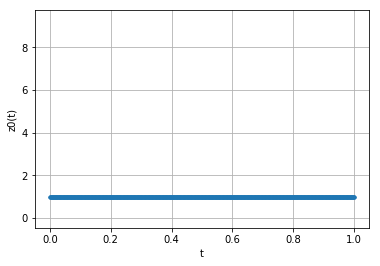

z1:


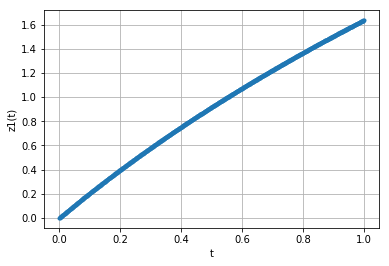

z2:


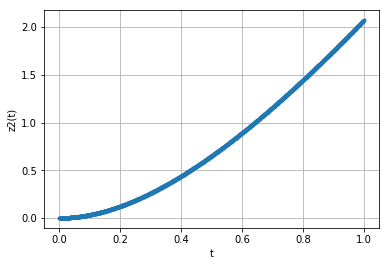

z3:


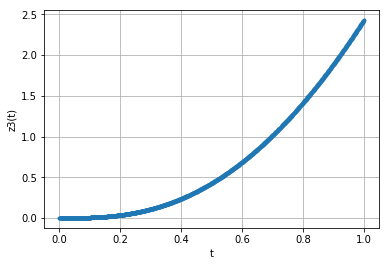

z4:


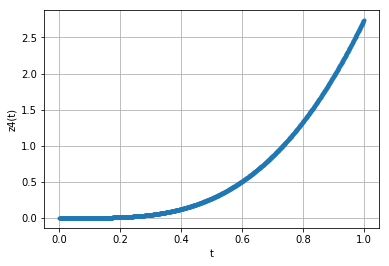

z5:


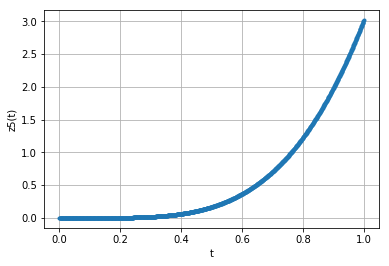

z6:


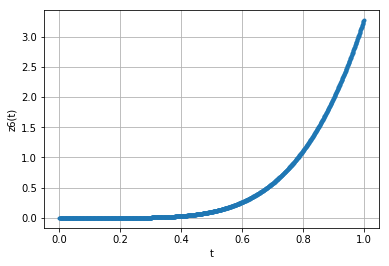

z7:


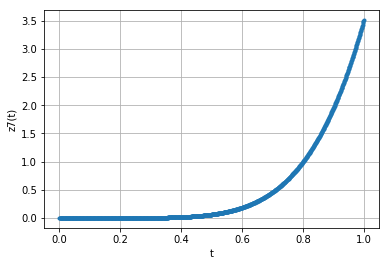

z8:


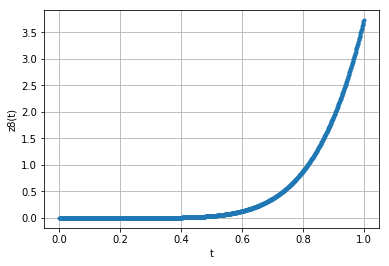

z9:


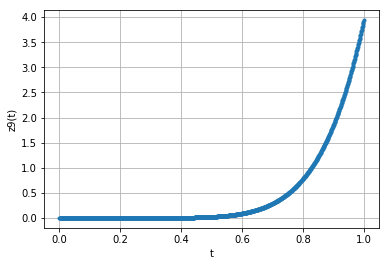

z10:


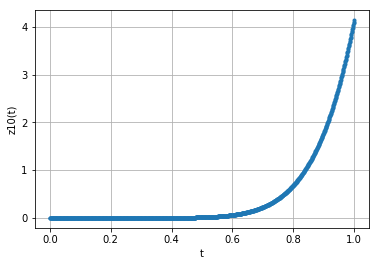

z11:


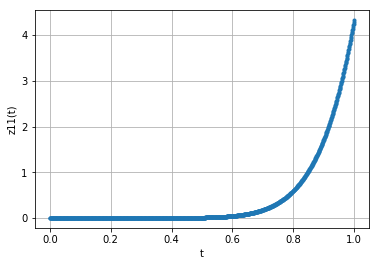

z12:


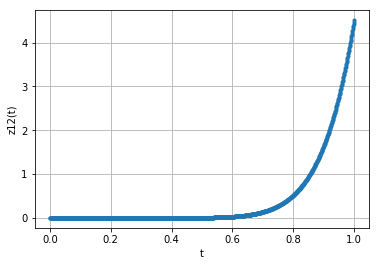

z13:


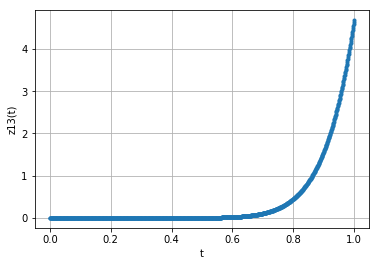

z14:


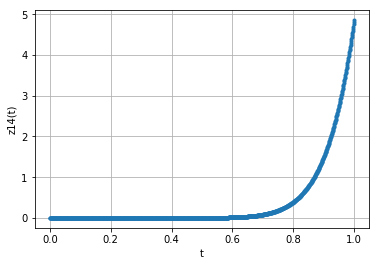

z15:


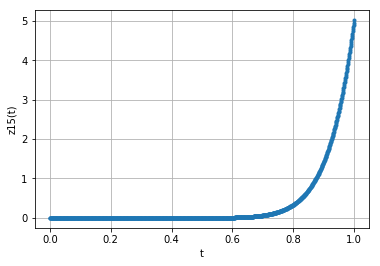

z16:


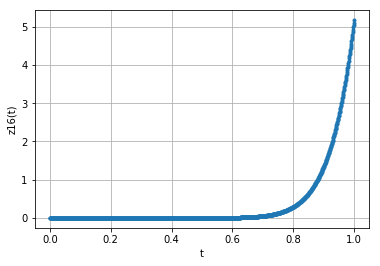

z17:


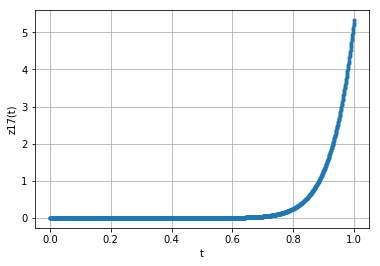

z18:


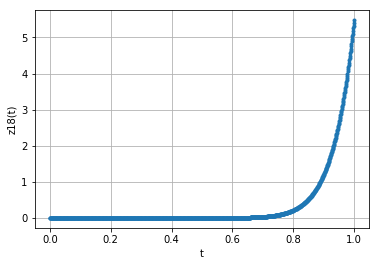

z19:


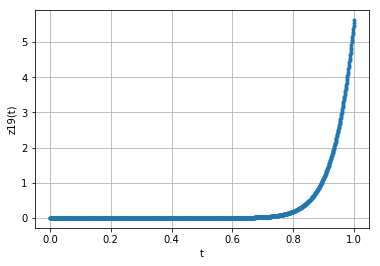

z20:


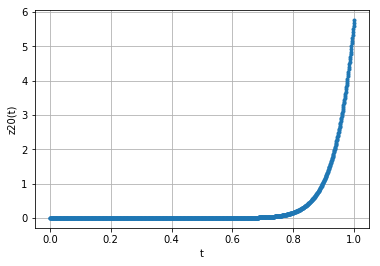

z21:


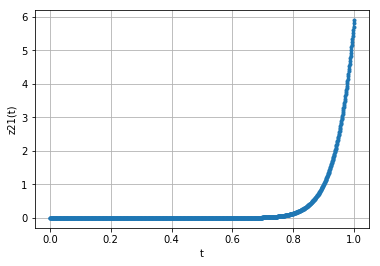

z22:


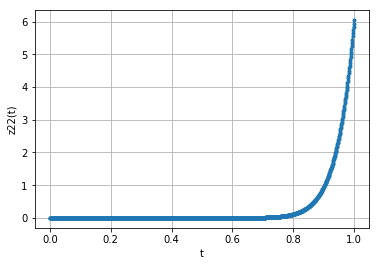

z23:


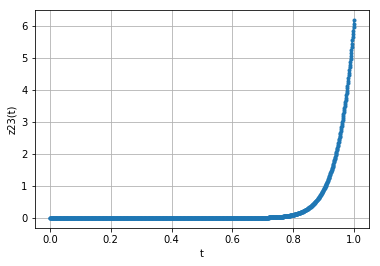

z24:


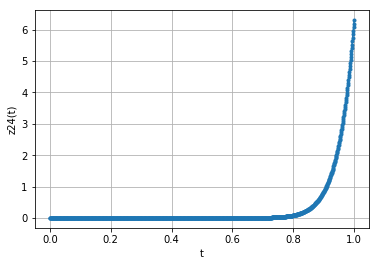

z25:


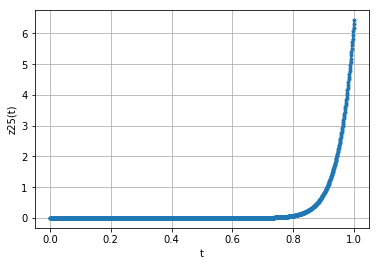

z26:


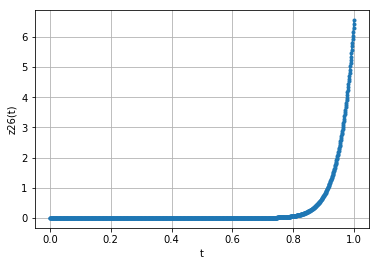

z27:


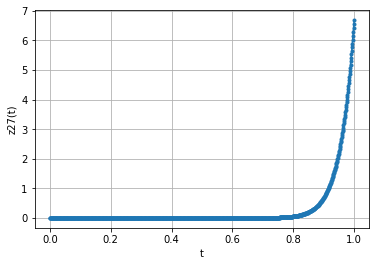

z28:


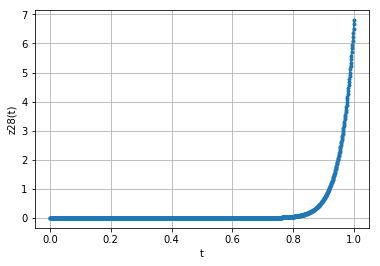

z29:


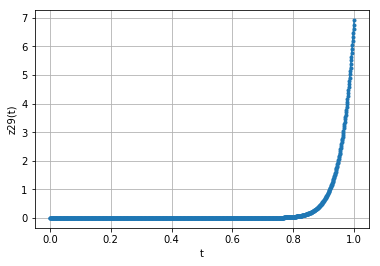

z30:


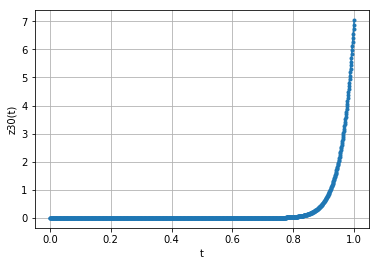

z31:


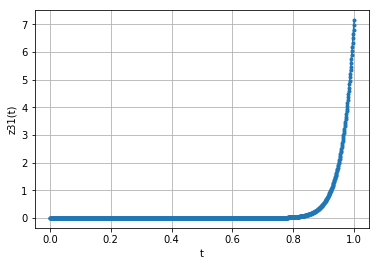

z32:


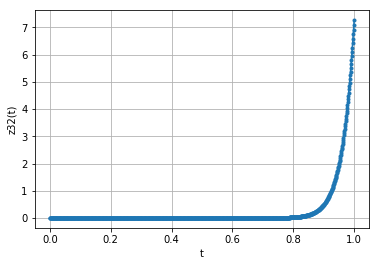

z33:


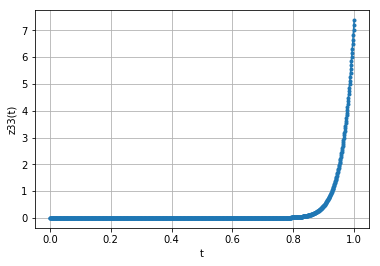

z34:


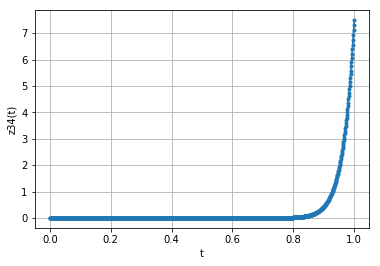

z35:


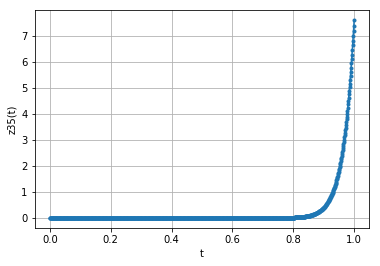

z36:


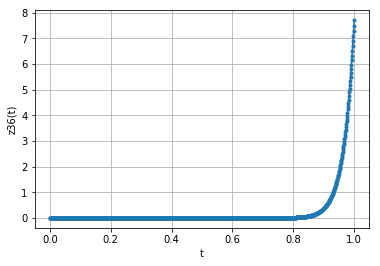

z37:


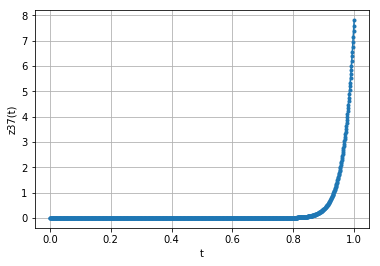

z38:


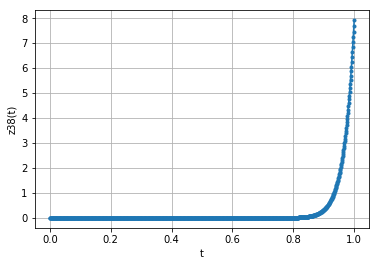

z39:


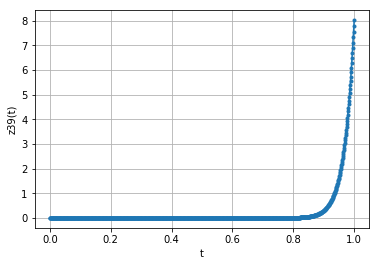

z40:


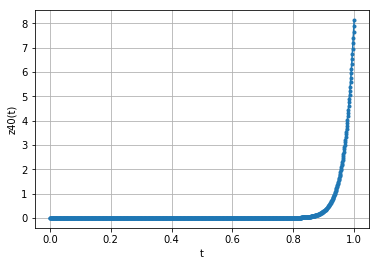

z41:


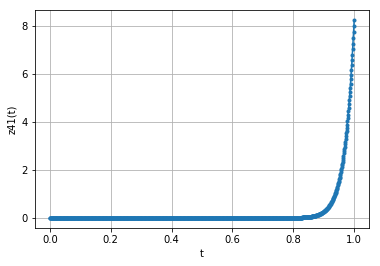

z42:


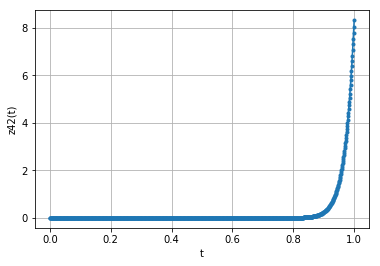

z43:


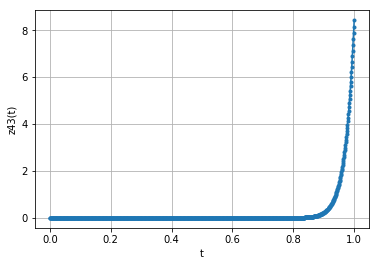

z44:


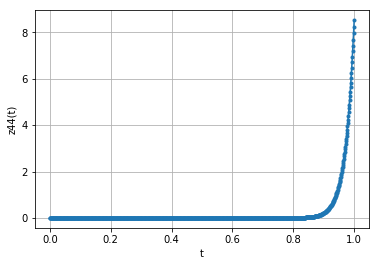

z45:


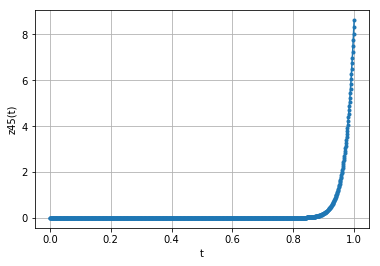

z46:


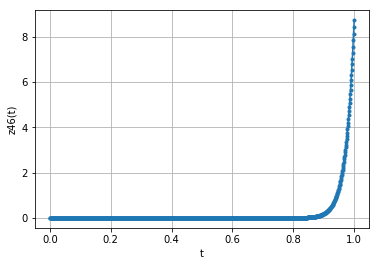

z47:


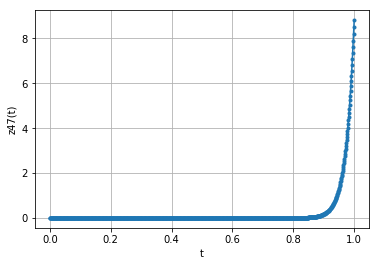

z48:


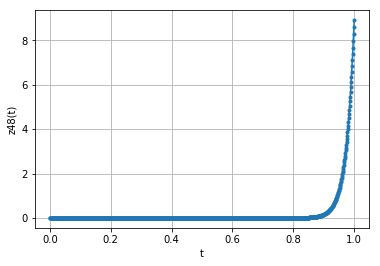

z49:


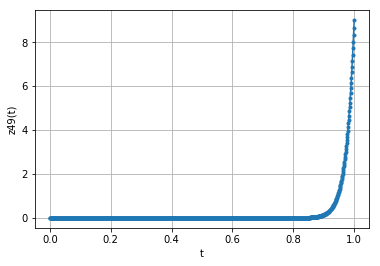

z50:


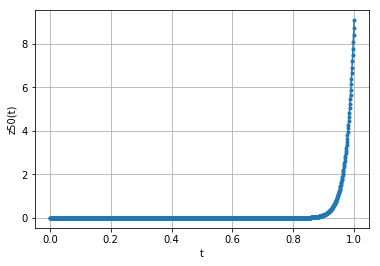

z51:


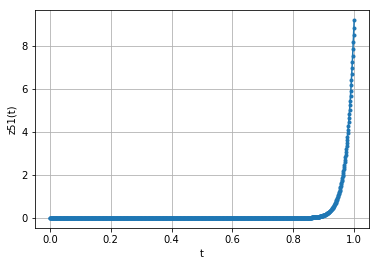

z52:


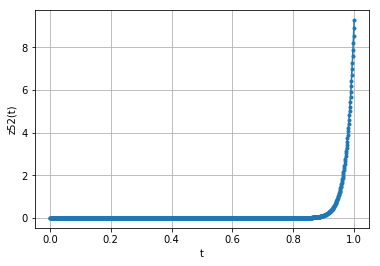

In [39]:
show_conseq_approx_z(zf2)

# $μ_{i}$ sequence
i=1...

In [40]:
show_mu(muf2)

[4.238087043356074, 3.283479187102333, 3.037963843540682, 2.922333467962212, 2.8546529010355415, 2.8101134318800853, 2.778545432155524, 2.75498969442114, 2.7367339814199214, 2.722168058654287, 2.710274885218452, 2.7003801742903804, 2.6920190739150875, 2.6848606379521307, 2.6786628098472463, 2.6732444356015774, 2.668467231401459, 2.6642238038370993, 2.660429476861583, 2.6570165845226548, 2.65393040272157, 2.65112619570057, 2.648567036331746, 2.6462221734989804, 2.6440657927505247, 2.64207606393449, 2.6402344011485, 2.6385248817482805, 2.6369337859021327, 2.6354492284818067, 2.6340608623823263, 2.6327596376051257, 2.6315376042468532, 2.630387750333305, 2.629303867513936, 2.6282804391880634, 2.627312546810218, 2.626395791019263, 2.6255262249255336, 2.6247002974243876, 2.6239148048212733, 2.6231668493806497, 2.622453803669654, 2.621773279773088, 2.6211231026207167, 2.620501286800052, 2.6199060163346823, 2.619335626994985, 2.618788590778855, 2.6182635022582073, 2.617759066534729, 2.61727408